In [36]:
#Initial imports
import pandas as pd                     #Panda library
import numpy as np                      #Numpy library
import datetime as dt                   #Date time library
from pathlib import Path                #Path library
import plotly.express as px             #Plotly library
import hvplot.pandas                    #HVPlot library
import panel as pn                      #Panel library

from panel.interact import interact     #Import interact
pn.extension("plotly")

%matplotlib inline

In [37]:
# Reading CO2 Global Data
co2_global_csv = Path("co2_global_data.csv")
co2_global = pd.read_csv(co2_global_csv,index_col='Year', parse_dates=True, usecols=['Year', 'Total CO2'])
co2_global

,Total CO2
Year,
1750-01-01,9.350528
1751-01-01,9.350528
1752-01-01,9.354192
1753-01-01,9.354192
1754-01-01,9.357856
...,...
2016-01-01,35452.459300
2017-01-01,35925.737690
2018-01-01,36646.139790


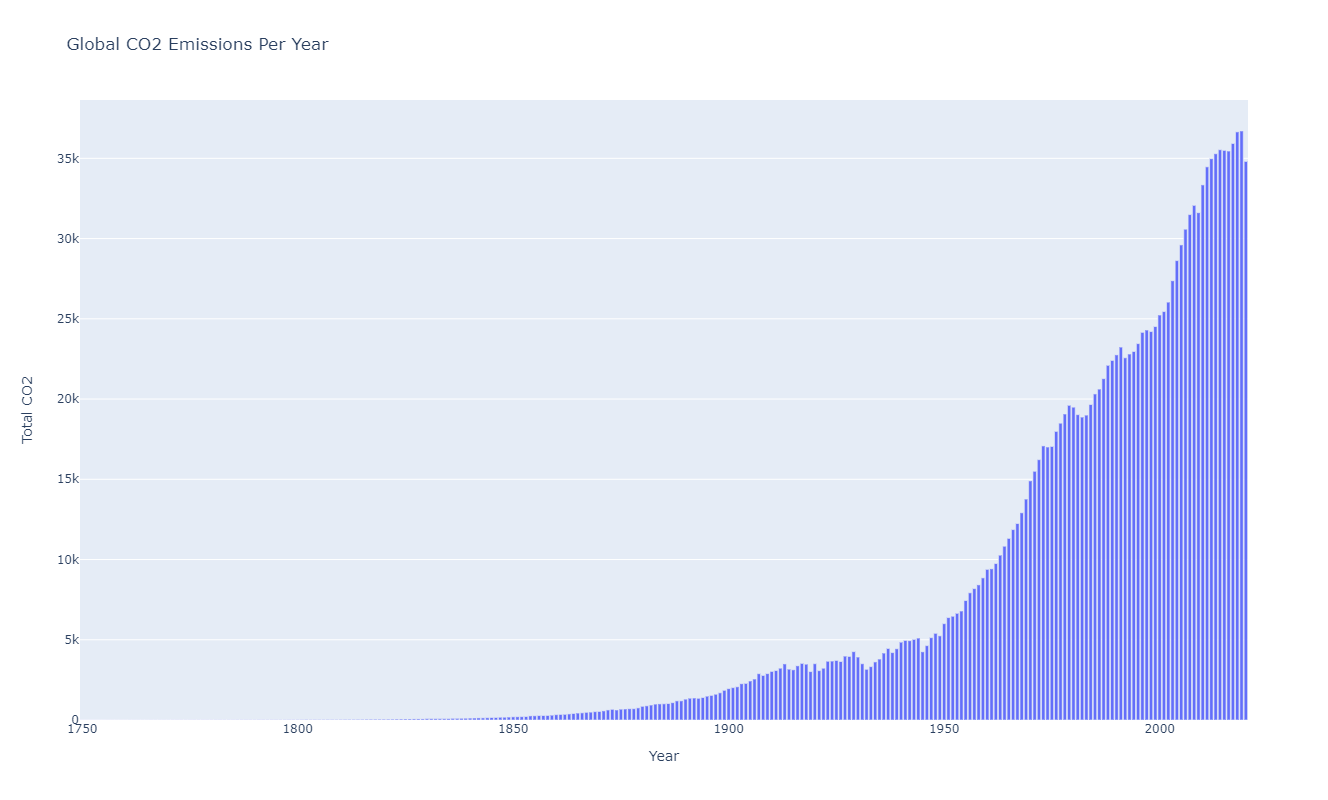

In [38]:
co2_per_year = co2_global.groupby("Year").sum().reset_index()
co2_plot = px.bar(
    co2_per_year, x="Year", y="Total CO2", title="Global CO2 Emissions Per Year", width=1500, height=800
)
co2_plot

In [39]:
# Reading CO2 Global Data Per Capita
co2_percapita_csv = Path("co2_global_data.csv")
co2_percapita = pd.read_csv(co2_percapita_csv,index_col='Year', parse_dates=True, usecols=['Year', 'CO2 Per Capita'])
co2_percapita

,CO2 Per Capita
Year,
1750-01-01,0.011492
1751-01-01,0.011438
1752-01-01,0.011390
1753-01-01,0.011339
1754-01-01,0.011294
...,...
2016-01-01,4.749780
2017-01-01,4.759726
2018-01-01,4.802215


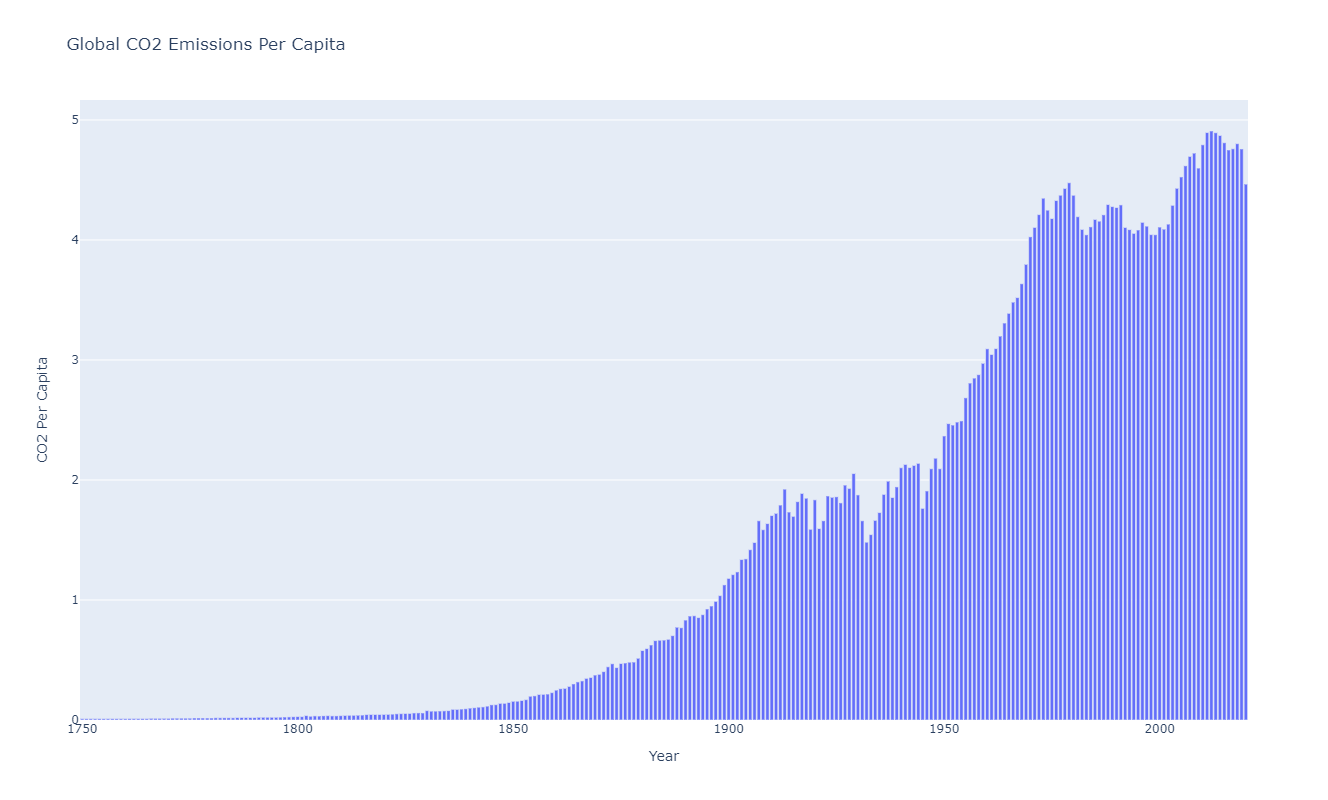

In [40]:
co2_per_capita = co2_percapita.groupby("Year").sum().reset_index()
co2_per_capita_plot = px.bar(
    co2_per_capita, x="Year", y="CO2 Per Capita", title="Global CO2 Emissions Per Capita", width=1500, height=800
)
co2_per_capita_plot

In [41]:
temp_change=pd.read_csv("Temperature.csv",index_col="Date")
temp_change

,Temperature Change
Date,
Jan 80,0.287
Feb 80,0.482
Mar 80,0.131
Apr 80,0.519
May 80,0.518
...,...
Aug 20,1.193
Sep 20,1.516
Oct 20,1.159


In [42]:
temp_change_plot = temp_change.hvplot(title="Global Temperature Anomalies ",width=1500, height=800,
                   line_dash="dotted",grid=True, ylabel="Temperature Change in Celsius")

temp_change_plot

:Curve   [Date]   (Temperature Change)

In [43]:
# Create tabs
tabs = pn.Tabs(
    ("Global CO2 Emissions Per Year", co2_plot),
    ("Global CO2 Emissions Per Capita", co2_per_capita_plot),
    ("Temperature Change in Celsius", temp_change_plot))
tabs

Tabs
    [0] Plotly(Figure, name='Global CO2 Emissions P...)
    [1] Plotly(Figure, name='Global CO2 Emissions P...)
    [2] HoloViews(Curve, name='Temperature C...)